# Analyse historical data from the Climate Change Knowledge Portal 

Author: [Giuseppe La Rocca] (mailto: giuseppe.larocca@egi.eu)

Creation date: 03-Sept-2019

Last updated: 13-March-2023

---

## Exercise: 

Calculate the historical precipitation data derived from the Climate Research Unit (Mitchell et at, 2003) aggregated to country and basin levels.

* Visit the [World Data Catalogue](https://datacatalog.worldbank.org/dataset/climate-change-knowledge-portal-historical-data)
* Click on the "Data & Resources" tab
* Download a copy of the "Climate Chnage Knowledge Portal: Historical Data" and safe the file in your computer
* Upload the .xlx spreadsheet in the user's workspace

The spreadsheet contains the following tabs:

* <u>Country_temperatureCRU</u>: mean monthly and annual temperatures by country for the period 1961-1999.  Values are in degrees Celsius.
* <u>Country_precipitationCRU</u>: mean monthly and annual precipitation by country for the period 1961-1999.  Values are in millimeters (mm).

For this exercise the dataset in the <u>Country_precipitationCRU</u> tab will be used.


## Import necessary libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### Provide the ISO_3DIGIT of the country you are interested to analyse

In [2]:
ISO_3DIGIT="ITA"

## Load historical datasets from local and create a DataFrame object

In [4]:
raw_data = pd.read_excel('./cckp_historical_data_0.xls', sheet_name='Country_precipitationCRU')

### Show keys() and datasets

In [5]:
# Show available keys()
raw_data.keys()

Index(['ISO_3DIGIT', 'Jan_precip', 'Feb_precip', 'Mar_precip', 'Apr_precip',
       'May_precip', 'Jun_precip', 'July_precip', 'Aug_precip', 'Sept_precip',
       'Oct_precip', 'Nov_precip', 'Dec_precip', 'Annual_precip'],
      dtype='object')

In [6]:
raw_data[:10]

,ISO_3DIGIT,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip
0,AFG,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374,311.321856
1,AGO,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423,991.305683
2,ALB,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834,1053.235184
3,ARE,5.955387,22.178000,16.587609,8.961470,1.080574,1.094061,2.284059,1.405504,0.495943,0.428552,1.740576,5.600291,67.812025
4,ARG,68.370440,63.654088,69.531037,46.481148,36.282154,28.080046,25.894385,24.096768,30.073554,47.715487,55.566664,63.300102,559.045871
5,ARM,20.840308,25.926385,40.105538,59.731154,82.848691,68.047154,43.063923,35.969692,29.429538,42.127385,30.794077,23.397923,502.281769
6,AUS,80.556646,75.809130,61.979699,31.123847,30.003293,23.827744,23.295618,20.269076,17.842302,24.365993,33.099031,50.919120,473.091500
7,AUT,67.701539,65.913564,75.921487,90.704667,113.363616,137.655924,136.999410,131.417537,94.905410,77.150845,92.210077,77.239770,1161.183869
8,AZE,24.679867,27.428844,40.522778,48.437356,56.827556,50.862511,25.203571,23.086845,34.152978,45.412756,30.503889,26.764289,433.883241
9,BDI,154.085002,139.050999,170.240001,193.731999,94.368999,12.223430,3.749010,13.850040,56.134100,96.152401,171.953999,157.271999,1262.812000


### Group datasets based on the "ISO_3DIGIT" code and check data structure

In [7]:
average_annual_rainfall = raw_data.groupby(['ISO_3DIGIT'])
#average_annual_rainfall.describe()

In [8]:
# Filter datasets by ISO_3DIGIT
iso_3digit_average_annual_rainfall = average_annual_rainfall.get_group(ISO_3DIGIT)
iso_3digit_average_annual_rainfall

,ISO_3DIGIT,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip
79,ITA,77.582595,71.877119,74.601048,78.998833,74.153342,67.460726,56.390238,71.921125,75.894357,95.069706,101.236373,85.008159,930.193617


### Create the DataFrame to plot

In [9]:
Data = {
    'Mean monthly and annual precipitation for period 1961-1999': [
          'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'
    ],
    
    'Precipitations': [
          iso_3digit_average_annual_rainfall['Jan_precip'].values[0],
          iso_3digit_average_annual_rainfall['Feb_precip'].values[0],
          iso_3digit_average_annual_rainfall['Mar_precip'].values[0],
          iso_3digit_average_annual_rainfall['Apr_precip'].values[0],
          iso_3digit_average_annual_rainfall['May_precip'].values[0],
          iso_3digit_average_annual_rainfall['Jun_precip'].values[0],
          iso_3digit_average_annual_rainfall['July_precip'].values[0],
          iso_3digit_average_annual_rainfall['Aug_precip'].values[0],
          iso_3digit_average_annual_rainfall['Sept_precip'].values[0],
          iso_3digit_average_annual_rainfall['Oct_precip'].values[0],
          iso_3digit_average_annual_rainfall['Nov_precip'].values[0],
          iso_3digit_average_annual_rainfall['Dec_precip'].values[0]
    ]
}

data_frame=DataFrame(Data, columns=['Mean monthly and annual precipitation for period 1961-1999', 'Precipitations'])
data_frame

,Mean monthly and annual precipitation for period 1961-1999,Precipitations
0,Jan,77.582595
1,Feb,71.877119
2,Mar,74.601048
3,Apr,78.998833
4,May,74.153342
5,Jun,67.460726
6,Jul,56.390238
7,Aug,71.921125
8,Sept,75.894357
9,Oct,95.069706


### Plot the DataFrame 

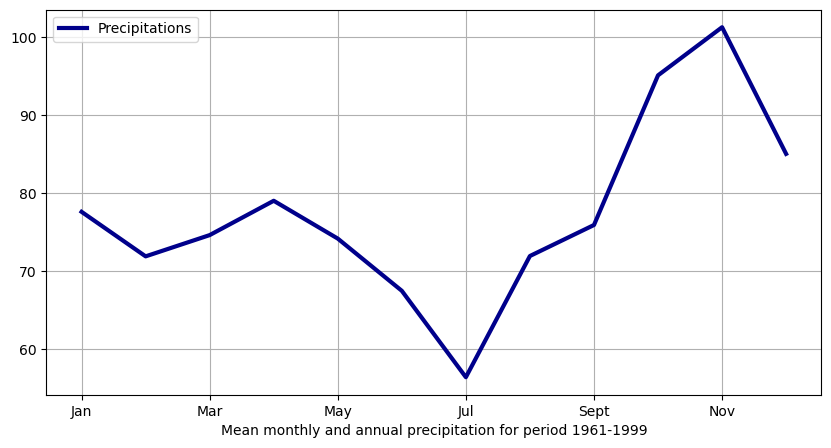

In [10]:
data_frame.plot(
    x='Mean monthly and annual precipitation for period 1961-1999', 
    y='Precipitations',
    color='darkblue', 
    figsize=(10,5),
    linewidth='3')

# Add legend, grid and show the plot
plt.grid()
plt.legend()

In [12]:
# Save the final plot
plt.savefig("./rainfalls.png")

<Figure size 640x480 with 0 Axes>